As shown in Lab 1, 2 and 3, we've developed some models for linear, multiple-linear and polynomial Regression, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.

import the visualization package: seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>

<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatter plot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

 Let's visualize Horsepower as potential predictor variable of price:

In [4]:
# path of data 
path = 'automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


(0.0, 48184.1100617546)

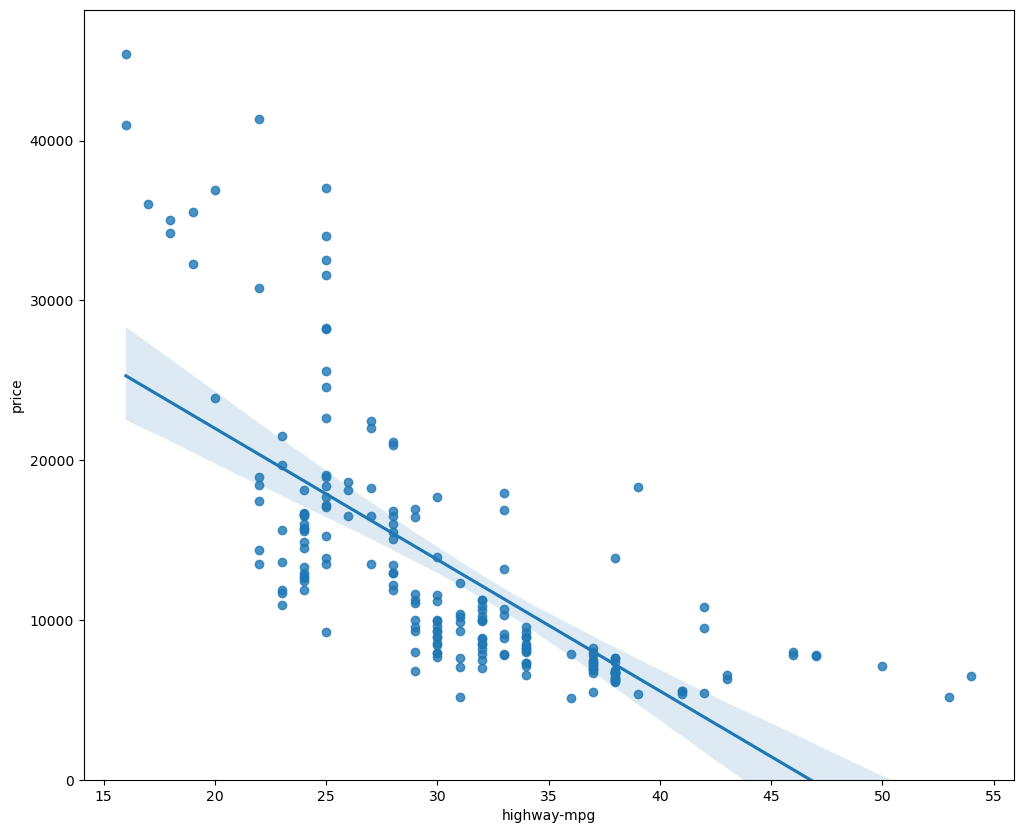

In [5]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.
One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".</p>

(0.0, 47414.1)

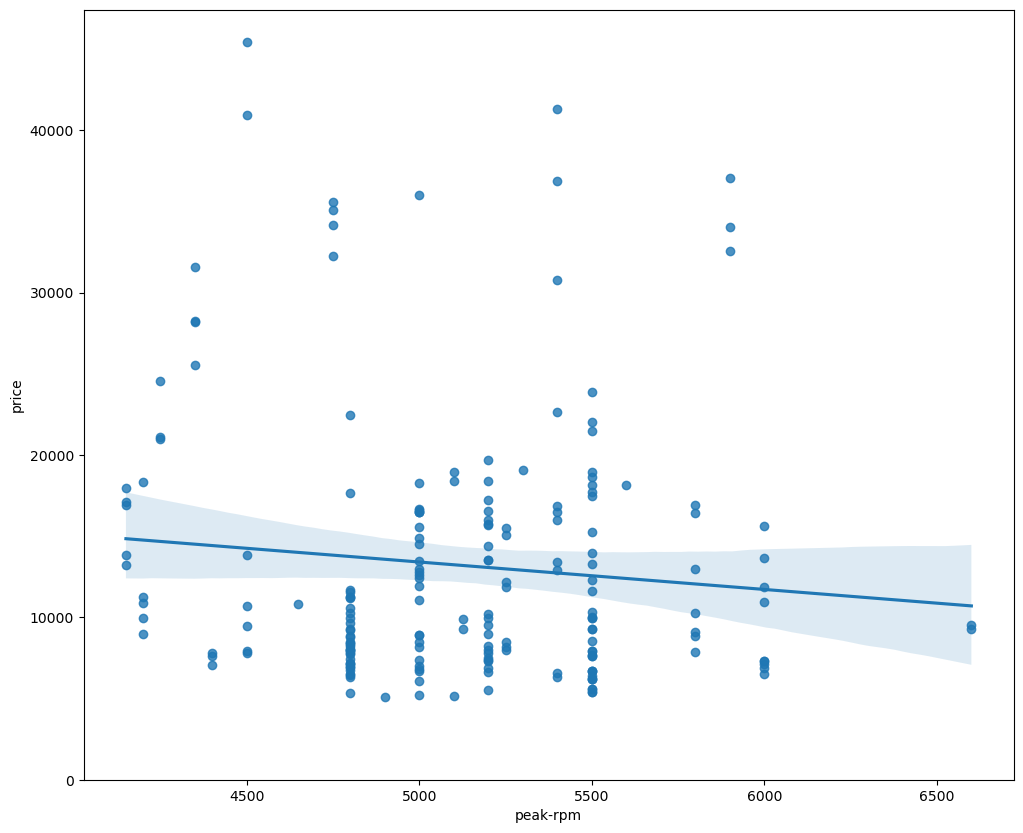

In [6]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.</p>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1:</h1>
<b>Given the regression plots above is "peak-rpm" or "highway-mpg" more strongly correlated with "price". Use the method  ".corr()" to verify your answer.</b>
</div>

In [7]:
correlation_highway_mpg = df['highway-mpg'].corr(df['price'])
correlation_peak_rpm = df['peak-rpm'].corr(df['price'])

print("Correlation between highway-mpg and price:", correlation_highway_mpg)
print("Correlation between peak-rpm and price:", correlation_peak_rpm)


Correlation between highway-mpg and price: -0.704692265058953
Correlation between peak-rpm and price: -0.10161587407588138


The correlation coefficient measures the strength and direction of the linear relationship between two variables. It ranges from -1 to 1, where:

1 indicates a perfect positive linear relationship (as one variable increases, the other also increases proportionally).
-1 indicates a perfect negative linear relationship (as one variable increases, the other decreases proportionally).
0 indicates no linear relationship between the variables.
In this case:

The correlation between "highway-mpg" and "price" is approximately -0.705. This value being close to -1 indicates a moderately strong negative linear relationship. As the highway miles per gallon (mpg) increases, the price tends to decrease.

The correlation between "peak-rpm" and "price" is approximately -0.102. This value, close to 0, indicates a very weak negative linear relationship. There's almost no observable linear trend between the peak revolutions per minute (rpm) and the price.

Therefore, based on these correlation coefficients:

"highway-mpg" has a stronger negative correlation with "price" compared to "peak-rpm".
As "highway-mpg" increases, "price" tends to decrease more significantly than the effect of "peak-rpm" on "price".

Double-click <b>here</b> for the solution.

<!-- The answer is below:

The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to   "peak-rpm" which is approximate     -0.101616. You can verify it using the following command:
df[["peak-rpm","highway-mpg","price"]].corr()

-->

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

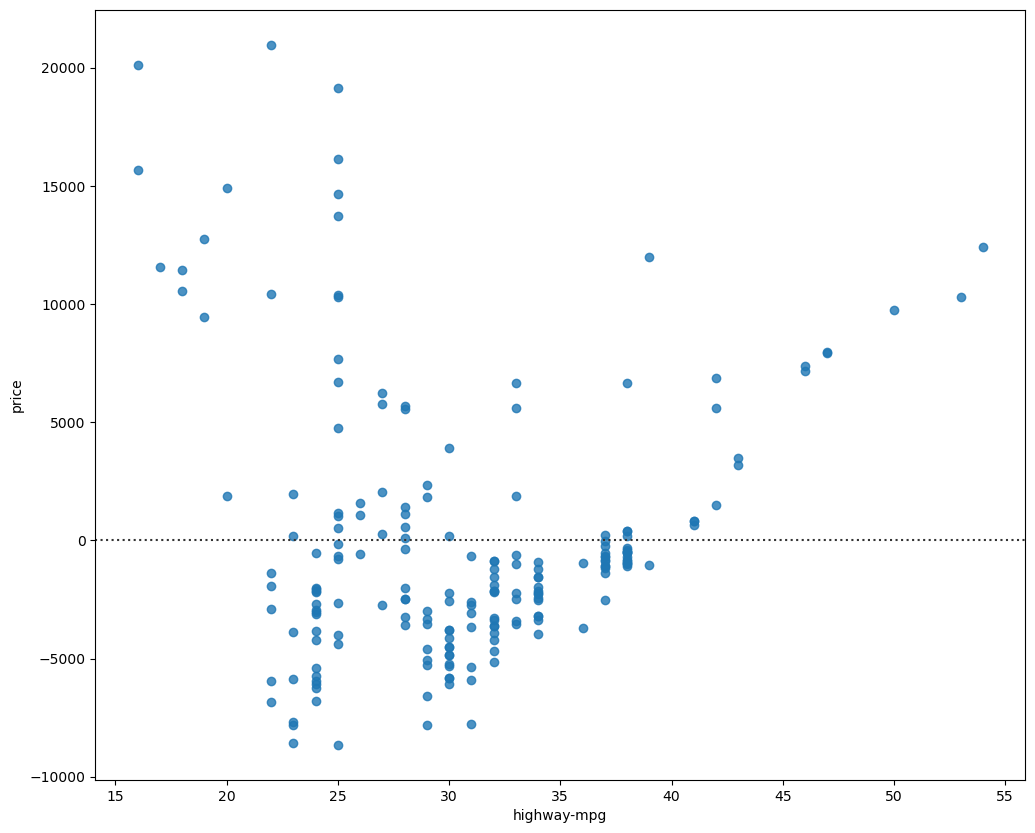

In [9]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.</p>

<h3>Multiple Linear Regression</h3>

<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

First lets make a prediction 

<h4>Lets load the modules for linear regression
and create the linear regression object</h4>

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

As before, let us define the predictors, develop the model using the below variables as the predictor variables and create the lm object

In [11]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

LinearRegression()

In [12]:
Y_hat = lm.predict(Z)

C:\Users\annaj\AppData\Local\Temp\ipykernel_27656\4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\annaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

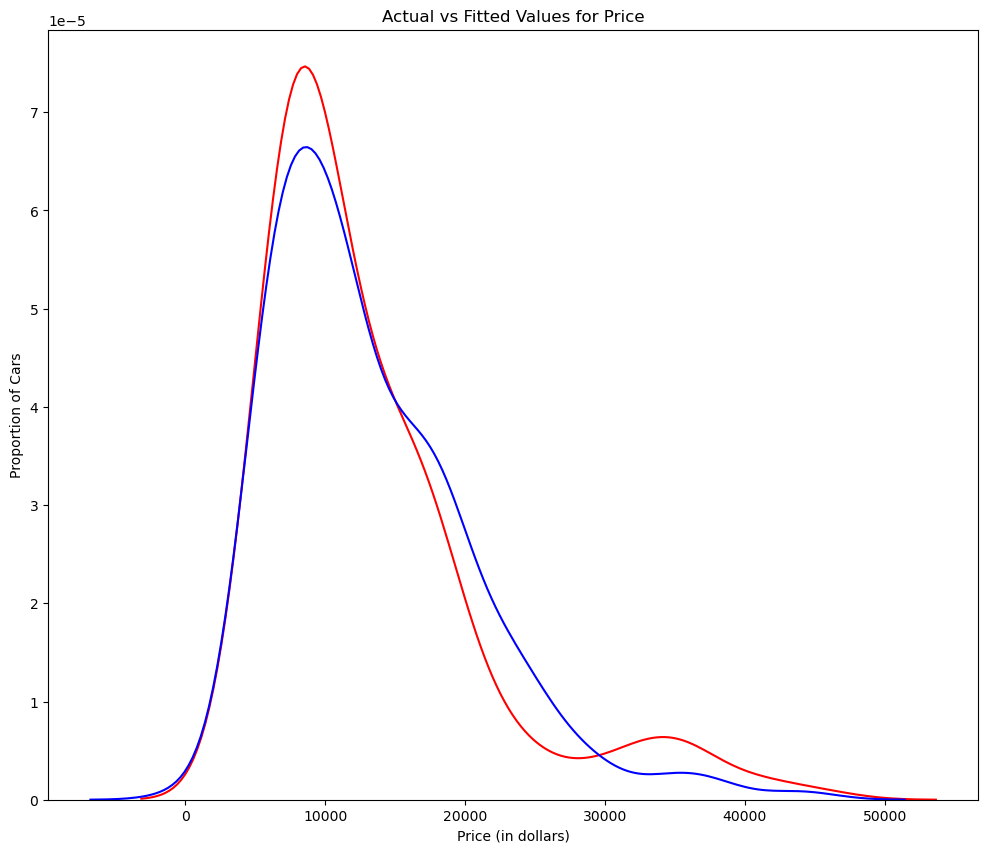

In [13]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<h2>Part 2: Measures for In-Sample Evaluation</h2>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

<h3>Model 1: Simple Linear Regression</h3>

Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [14]:
X = df[['highway-mpg']]
Y = df['price']

Let's calculate the R^2

In [15]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [16]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


The values [16236.50464347 16236.50464347 17058.23802179 13771.3045085] are the predicted prices for the first four instances in our dataset. For example:

    The first data point has a predicted price of approximately 16236.50.
    The second data point also has a predicted price of approximately 16236.50.
    The third data point has a predicted price of around 17058.24.
    And the fourth data point has a predicted price of approximately 13771.30.
These predicted prices are generated by our regression model using the input features or variables present in our dataset. They represent the model's estimate of what the price of an automobile would be based on the information provided by those specific data points.

lets import the function <b>mean_squared_error</b> from the module <b>metrics</b>

In [17]:
from sklearn.metrics import mean_squared_error

we compare the predicted results with the actual results 

In [18]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


This number, 31635042.944639895, represents the average squared difference between the 'price' of automobiles (the actual values) and the predicted values obtained from your model. It's a large value in this context, indicating that, on average, the squared difference between the actual and predicted prices is quite substantial.

<h3>Model 2: Multiple Linear Regression</h3>

Let's calculate the R^2

In [19]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE

 we produce a prediction 

In [20]:
Y_predict_multifit = lm.predict(Z)

 we compare the predicted results with the actual results 

In [21]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>

Let's calculate the R^2

let’s import the function <b>r2_score</b> from the module <b>metrics</b> as we are using a different function

In [22]:
from sklearn.metrics import r2_score

Define our variables

In [23]:
x = df['highway-mpg']
y = df['price']

In [24]:
# Let's fit the polynomial using the function polyfit. Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)

We apply the function to get the value of r^2

In [25]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


R-squared typically ranges from 0 to 1, where:

    0 indicates that the model doesn't explain any variability in the target variable.
    1 indicates that the model perfectly explains the variability in the target variable.
In our case, an R-squared value of 0.674194666390652 means that approximately 67.42% of the variance in the 'price' of automobiles can be explained by the independent variable(s) used in our regression model.

We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

<h3>MSE</h3>

We can also calculate the MSE:  

In [26]:
mean_squared_error(df['price'], p(x))

20474146.426361218

An MSE of 20474146.426361218 means that, on average, the square of the difference between the actual and predicted prices (or the predicted and observed values) is approximately 20474146.42. Smaller MSE values generally signal better predictive performance, indicating that the model's predictions align more closely with the actual values, resulting in smaller deviations between them.